IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva\M2\FAULT_M2_5


VOLO m2 FAULT 5%

In [3]:
rcou_m2_fault5 = pd.read_csv("RCOU.csv")
rcou_m2_fault5 = rcou_m2_fault5.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m2_fault5 = rcou_m2_fault5[((rcou_m2_fault5['C9'] >= 1400) & (rcou_m2_fault5['C10'] >= 1400) & (rcou_m2_fault5['C11'] >= 1400) & (rcou_m2_fault5['C12'] >= 1400) & (rcou_m2_fault5['C13'] >= 1400) & (rcou_m2_fault5['C14']>= 1400))]

pd.set_option('display.max_rows',700)
display(rcou_m2_fault5)

,TimeUS,C9,C10,C11,C12,C13,C14
2420,70614501,1416,1480,1456,1442,1422,1475
2421,70628999,1448,1463,1501,1407,1494,1416
2422,70639526,1458,1465,1492,1429,1488,1434
2423,70649667,1467,1467,1477,1456,1476,1457
2424,70660471,1482,1462,1489,1455,1497,1446
...,...,...,...,...,...,...,...
7938,131338225,1525,1447,1519,1454,1463,1510
7939,131348455,1514,1459,1534,1436,1464,1509
7940,131358716,1506,1466,1525,1446,1443,1527
7941,131368599,1519,1450,1526,1441,1457,1513


In [4]:
xkf1_m2_fault5 = pd.read_csv("XKF1_0.csv")
xkf1_m2_fault5 = xkf1_m2_fault5.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m2_fault5 = xkf1_m2_fault5[((xkf1_m2_fault5['TimeUS'] >= 70614501) & (xkf1_m2_fault5['TimeUS'] <= 131379386))]
print(xkf1_m2_fault5)

         TimeUS  Roll  Pitch    Yaw
2423   70626950  0.80  -0.96  22.96
2424   70637199  0.79  -0.98  22.96
2425   70647273  0.78  -0.98  22.97
2426   70657896  0.78  -1.00  22.97
2427   70668621  0.75  -1.02  22.98
...         ...   ...    ...    ...
7944  131335984 -1.93   3.05  22.04
7945  131346546 -1.94   2.95  22.14
7946  131356703 -1.94   2.88  22.24
7947  131366708 -1.93   2.76  22.34
7948  131376923 -1.88   2.59  22.41

[5526 rows x 4 columns]


In [5]:
att_m2_fault5 = pd.read_csv("ATT.csv")
att_m2_fault5 = att_m2_fault5.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m2_fault5 = att_m2_fault5[((att_m2_fault5['TimeUS'] >= 70614501) & (att_m2_fault5['TimeUS'] <= 131379386))]
print(att_m2_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
2423   70628393     0.03  0.80      0.10  -0.96   22.93  22.96
2424   70638624     0.03  0.79      0.10  -0.98   22.93  22.96
2425   70648917     0.03  0.78      0.11  -0.98   22.93  22.97
2426   70659553     0.03  0.78      0.12  -1.00   22.93  22.97
2427   70670344     0.03  0.75      0.13  -1.02   22.93  22.98
...         ...      ...   ...       ...    ...     ...    ...
7947  131337507     1.82 -1.93      0.58   3.05   25.39  22.04
7948  131347650     1.88 -1.94      0.52   2.95   25.39  22.14
7949  131358142     1.94 -1.94      0.46   2.88   25.39  22.24
7950  131367962     2.01 -1.93      0.41   2.76   25.39  22.34
7951  131378544     2.06 -1.88      0.37   2.59   25.38  22.41

[5529 rows x 7 columns]


In [6]:
att_m2_fault5 = pd.merge_asof(att_m2_fault5,xkf1_m2_fault5, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m2_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
0      70628393     0.03  0.80      0.10  -0.96   22.93  22.96
1      70638624     0.03  0.79      0.10  -0.98   22.93  22.96
2      70648917     0.03  0.78      0.11  -0.98   22.93  22.97
3      70659553     0.03  0.78      0.12  -1.00   22.93  22.97
4      70670344     0.03  0.75      0.13  -1.02   22.93  22.98
...         ...      ...   ...       ...    ...     ...    ...
5524  131337507     1.82 -1.93      0.58   3.05   25.39  22.04
5525  131347650     1.88 -1.94      0.52   2.95   25.39  22.14
5526  131358142     1.94 -1.94      0.46   2.88   25.39  22.24
5527  131367962     2.01 -1.93      0.41   2.76   25.39  22.34
5528  131378544     2.06 -1.88      0.37   2.59   25.38  22.41

[5529 rows x 7 columns]


In [7]:
esc_1_m2_fault5 = pd.read_csv("ESC_1.csv")
esc_1_m2_fault5 = esc_1_m2_fault5.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_1_m2_fault5 = esc_1_m2_fault5[((esc_1_m2_fault5['TimeUS'] >= 70614501) & (esc_1_m2_fault5['TimeUS'] <= 131379386))]
print(esc_1_m2_fault5)

        TimeUS   RPM  Curr
226   70616517  4017  2.61
227   70724673  4682  2.83
228   70827676  5109  3.52
229   70933456  5702  3.36
230   71051945  5804  2.54
231   71155805  5662  1.73
232   71266434  5284  1.62
233   71381093  4936  1.73
234   71491540  4872  1.58
235   71595272  4741  1.63
236   71706924  4729  1.57
237   71914402  4752  1.56
238   72035159  4318  1.67
239   72138684  4213  1.89
240   72249413  4211  2.68
241   72353917  4377  2.05
242   72472622  4805  2.14
243   72580678  5012  2.04
244   72686255  4872  2.21
245   72792657  5114  2.36
246   72899799  5128  2.25
247   73018939  5167  2.11
248   73113169  5275  2.03
249   73228903  5090  2.20
250   73335506  5143  2.16
251   73444704  5178  2.29
252   73551474  5274  2.12
253   73661048  5127  2.05
254   73776798  5105  1.75
255   73879491  5004  2.04
256   73986497  4920  2.04
257   74097032  5014  1.94
258   74310633  5026  1.69
259   74539505  4864  1.79
260   74633157  4786  1.99
261   74746528  4868  2.28
2

In [8]:
imu_2_m2_fault5 = pd.read_csv("IMU_2.csv")
imu_2_m2_fault5 = imu_2_m2_fault5.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m2_fault5 = imu_2_m2_fault5[((imu_2_m2_fault5['TimeUS'] >= 70614501) & (imu_2_m2_fault5['TimeUS'] <= 131379386))]
print(imu_2_m2_fault5)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
9573    70616375 -0.055046 -0.052377 -0.011207 -0.166060  0.273514  -9.717393
9574    70621789  0.089052  0.031634 -0.010612 -0.258759  0.174801 -10.251830
9575    70628180 -0.002446 -0.056335 -0.023127 -0.291703 -0.011755 -10.056950
9576    70631689  0.029754 -0.033931 -0.008155 -0.316784 -0.110613 -10.065700
9577    70633488 -0.017690  0.042331  0.008342 -0.330894 -0.195240 -10.101020
...          ...       ...       ...       ...       ...       ...        ...
30548  131367802  0.011825 -0.207308  0.156284  0.600088  0.554415 -10.538300
30549  131370473  0.002054 -0.202995  0.160413  0.607579  0.646880 -10.524500
30550  131373093  0.022602 -0.259851  0.147129  0.591488  0.759371 -10.474610
30551  131376133  0.045938 -0.286306  0.137208  0.552823  0.840802 -10.579710
30552  131378441  0.082656 -0.258289  0.124889  0.530554  0.954088 -10.965860

[20980 rows x 7 columns]


In [9]:
m2_fault5 = pd.merge_asof(att_m2_fault5, imu_2_m2_fault5, on="TimeUS",  tolerance= 100000)
print(m2_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw      GyrX  \
0      70628393     0.03  0.80      0.10  -0.96   22.93  22.96 -0.002446   
1      70638624     0.03  0.79      0.10  -0.98   22.93  22.96 -0.012227   
2      70648917     0.03  0.78      0.11  -0.98   22.93  22.97 -0.013179   
3      70659553     0.03  0.78      0.12  -1.00   22.93  22.97  0.006291   
4      70670344     0.03  0.75      0.13  -1.02   22.93  22.98 -0.057392   
...         ...      ...   ...       ...    ...     ...    ...       ...   
5524  131337507     1.82 -1.93      0.58   3.05   25.39  22.04  0.026053   
5525  131347650     1.88 -1.94      0.52   2.95   25.39  22.14 -0.004182   
5526  131358142     1.94 -1.94      0.46   2.88   25.39  22.24 -0.031159   
5527  131367962     2.01 -1.93      0.41   2.76   25.39  22.34  0.011825   
5528  131378544     2.06 -1.88      0.37   2.59   25.38  22.41  0.082656   

          GyrY      GyrZ      AccX      AccY       AccZ  
0    -0.056335 -0.023127 -0.2

In [10]:
m2_fault5 = pd.merge_asof(esc_1_m2_fault5, m2_fault5, on="TimeUS",  tolerance= 100000)
m2_fault5 = m2_fault5.dropna()
print(m2_fault5)

        TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw    Yaw  \
1     70724673  4682  2.83     0.04   0.65      0.22  -1.15   22.93  23.00   
2     70827676  5109  3.52     0.04   0.58      0.43  -1.39   22.93  23.12   
3     70933456  5702  3.36     0.00   0.38      0.88  -0.83   22.93  23.67   
4     71051945  5804  2.54    -0.31   0.66      1.59   0.81   22.93  24.98   
5     71155805  5662  1.73    -0.70   1.07      2.18   1.75   22.93  26.46   
6     71266434  5284  1.62    -1.22   1.35      2.41   2.38   22.92  27.89   
7     71381093  4936  1.73    -2.00   1.01      2.69   1.92   22.92  29.19   
8     71491540  4872  1.58    -2.70   0.36      3.00   1.61   22.90  29.98   
9     71595272  4741  1.63    -3.39  -0.49      3.16   2.03   22.50  30.50   
10    71706924  4729  1.57    -3.82  -1.39      3.31   2.74   20.68  30.64   
11    71914402  4752  1.56    -3.90  -1.77      3.34   3.23   15.80  29.03   
12    72035159  4318  1.67    -3.79  -1.71      2.82   2.95   13

In [11]:
m2_fault5["TimeUS"] = m2_fault5["TimeUS"] - m2_fault5.iloc[0]["TimeUS"]
m2_fault5["TimeUS"] = m2_fault5["TimeUS"].astype(int)
m2_fault5["Guasto"] = 1
print(m2_fault5)

       TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw    Yaw  \
1           0  4682  2.83     0.04   0.65      0.22  -1.15   22.93  23.00   
2      103003  5109  3.52     0.04   0.58      0.43  -1.39   22.93  23.12   
3      208783  5702  3.36     0.00   0.38      0.88  -0.83   22.93  23.67   
4      327272  5804  2.54    -0.31   0.66      1.59   0.81   22.93  24.98   
5      431132  5662  1.73    -0.70   1.07      2.18   1.75   22.93  26.46   
6      541761  5284  1.62    -1.22   1.35      2.41   2.38   22.92  27.89   
7      656420  4936  1.73    -2.00   1.01      2.69   1.92   22.92  29.19   
8      766867  4872  1.58    -2.70   0.36      3.00   1.61   22.90  29.98   
9      870599  4741  1.63    -3.39  -0.49      3.16   2.03   22.50  30.50   
10     982251  4729  1.57    -3.82  -1.39      3.31   2.74   20.68  30.64   
11    1189729  4752  1.56    -3.90  -1.77      3.34   3.23   15.80  29.03   
12    1310486  4318  1.67    -3.79  -1.71      2.82   2.95   13.02  26.97   

In [12]:
path_file = path_file.replace(r"M2\FAULT_M2_5", "")
os.chdir(path_file)
m2_fault5.to_csv('m2_fault5.csv', index=False)
print(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva\


## Analisi nel tempo e in frequenza

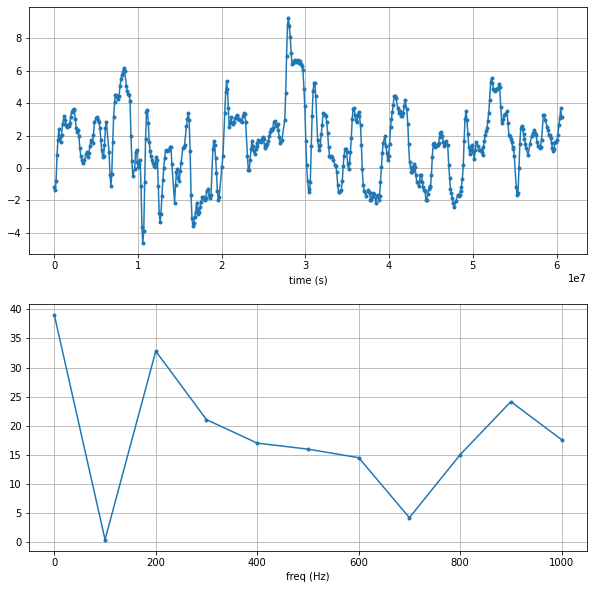

In [13]:
t = m2_fault5["TimeUS"]
y = m2_fault5["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

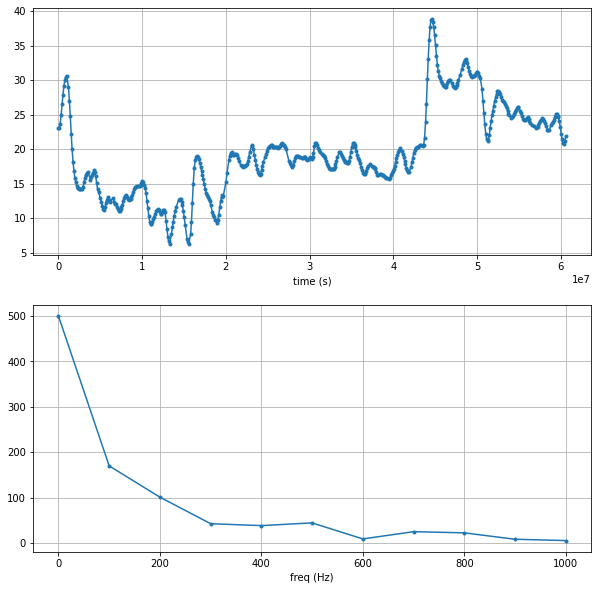

In [14]:
t = m2_fault5["TimeUS"]
y = m2_fault5["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

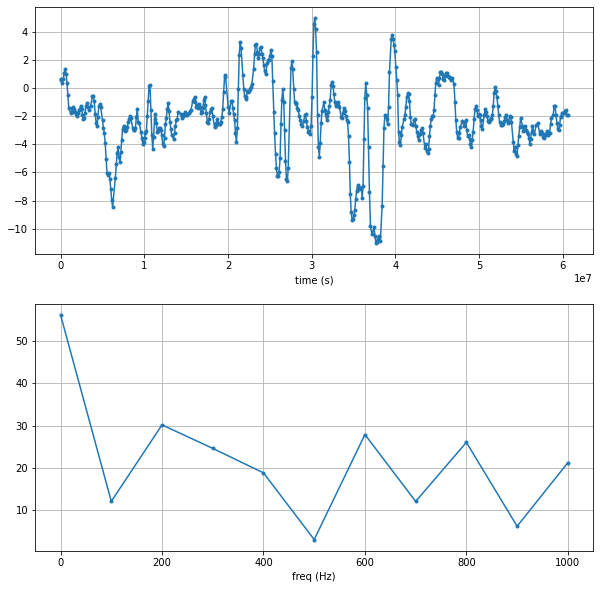

In [15]:
t = m2_fault5["TimeUS"]
y = m2_fault5["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

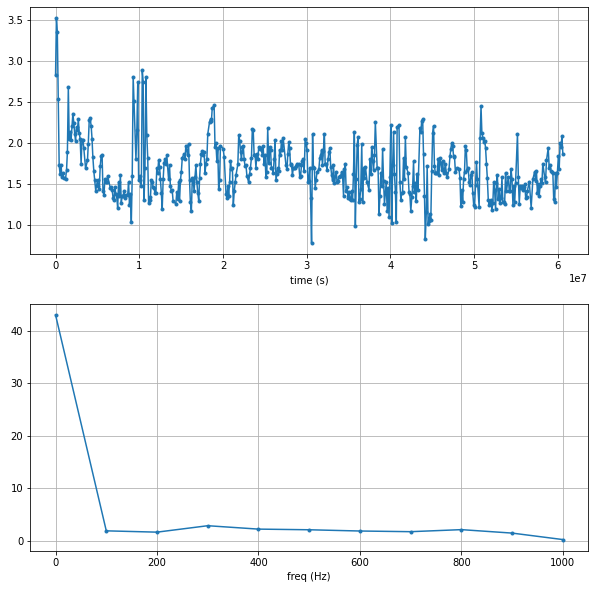

In [16]:
t = m2_fault5["TimeUS"]
y = m2_fault5["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

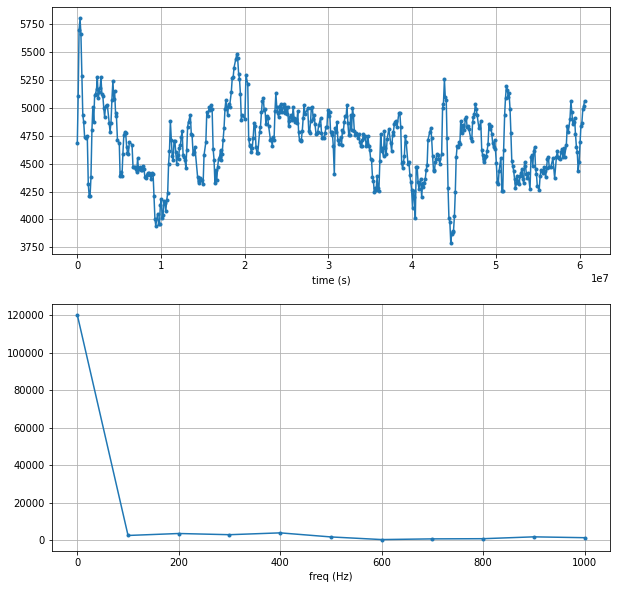

In [17]:
t = m2_fault5["TimeUS"]
y = m2_fault5["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

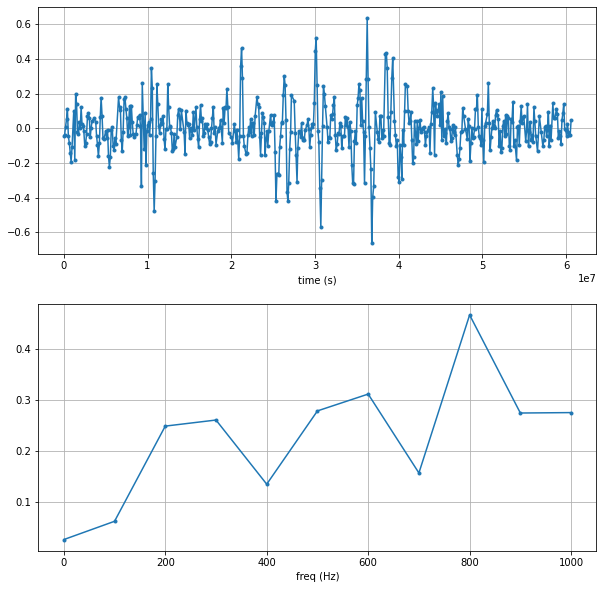

In [18]:
t = m2_fault5["TimeUS"]
y = m2_fault5["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

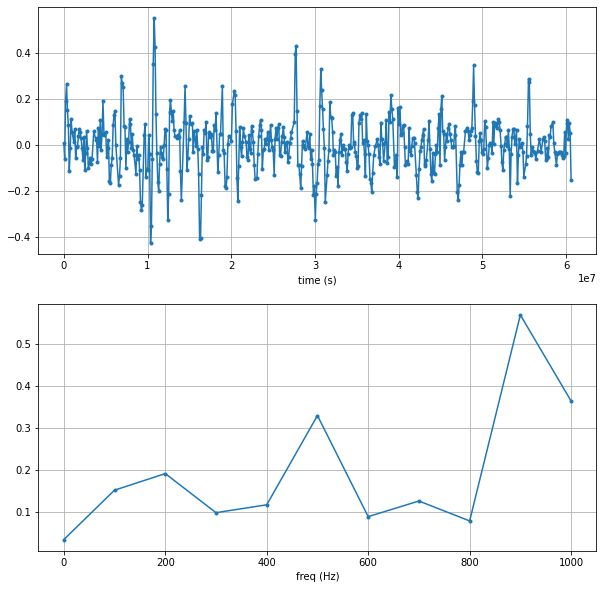

In [19]:
t = m2_fault5["TimeUS"]
y = m2_fault5["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

In [ ]:
t = m2_fault5["TimeUS"]
y = m2_fault5["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

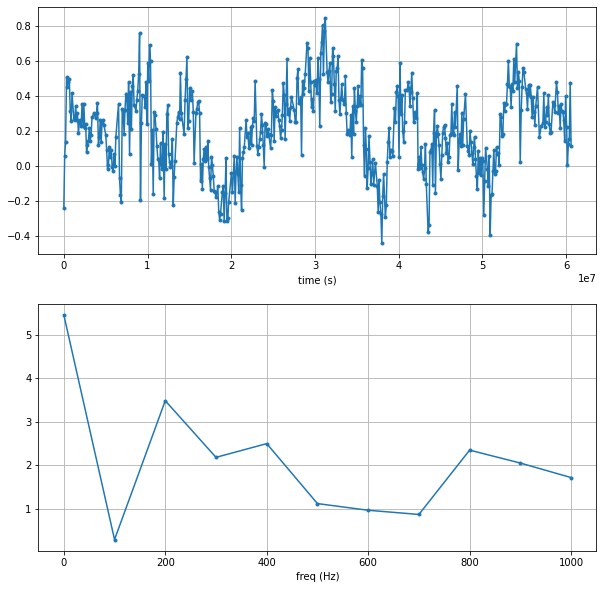

In [20]:
t = m2_fault5["TimeUS"]
y = m2_fault5["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

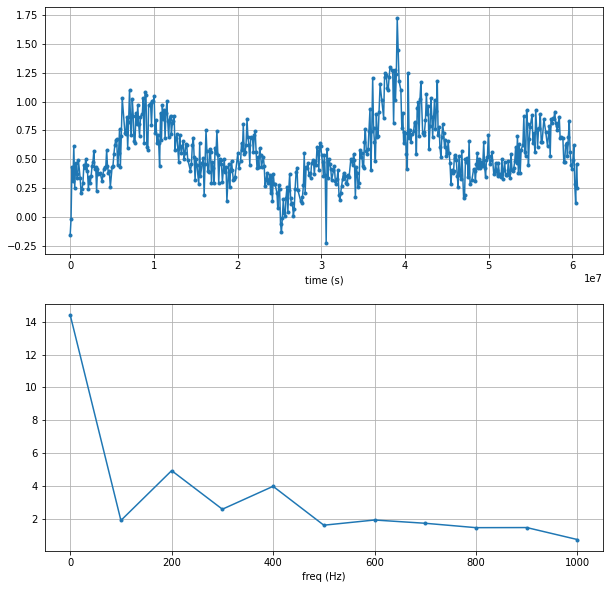

In [21]:
t = m2_fault5["TimeUS"]
y = m2_fault5["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

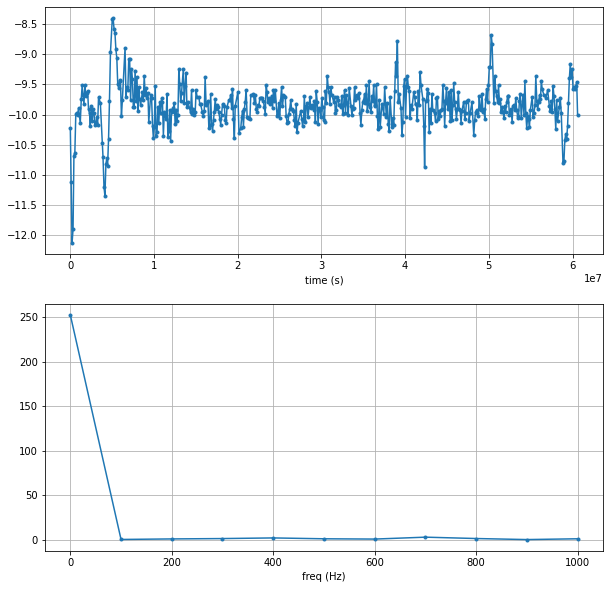

In [22]:
t = m2_fault5["TimeUS"]
y = m2_fault5["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()